# Generate simple spiking motif with a define function (cosine, linear, vonmises)

In [1]:
from brainhack import make_spiketrains_motif, cospattern, linear, vonmises

In [2]:
nb_neuron = 50
noise_density = 5e-3
simulation_time = 1e3 # in ms
motif_temporal_amplitude = 100
t_true = [500] # has to be a list
function = vonmises # can be 'linear' or 'vonmises' as well
spike_trains = make_spiketrains_motif(nb_neuron, noise_density, simulation_time, motif_temporal_amplitude, t_true, function= function)

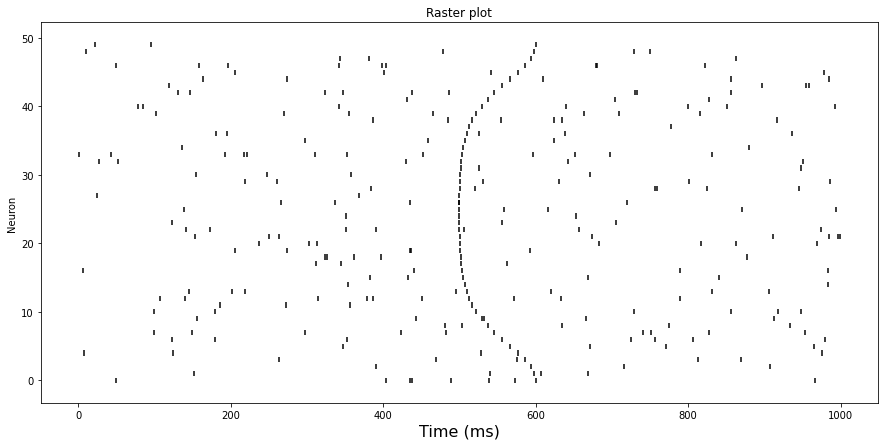

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.eventplot([spike_trains[i].times for i in range(len(spike_trains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

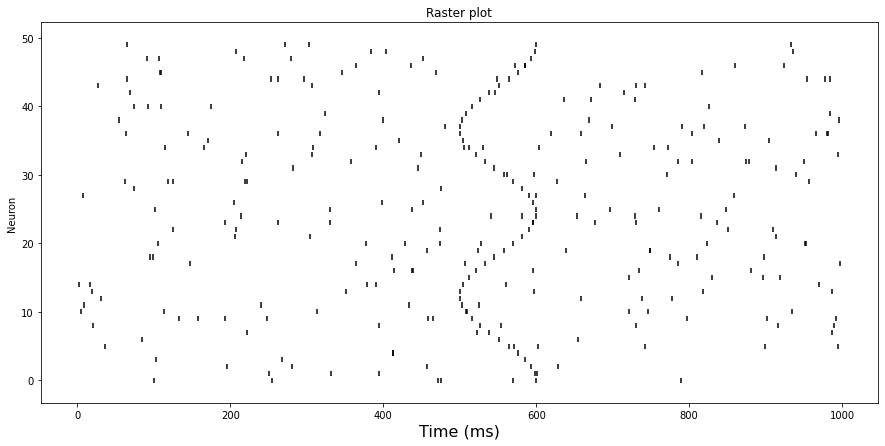

In [4]:
function = cospattern

spike_trains = make_spiketrains_motif(nb_neuron, noise_density, simulation_time, motif_temporal_amplitude, t_true, function= function)
plt.figure(figsize=(15, 7))
plt.eventplot([spike_trains[i].times for i in range(len(spike_trains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

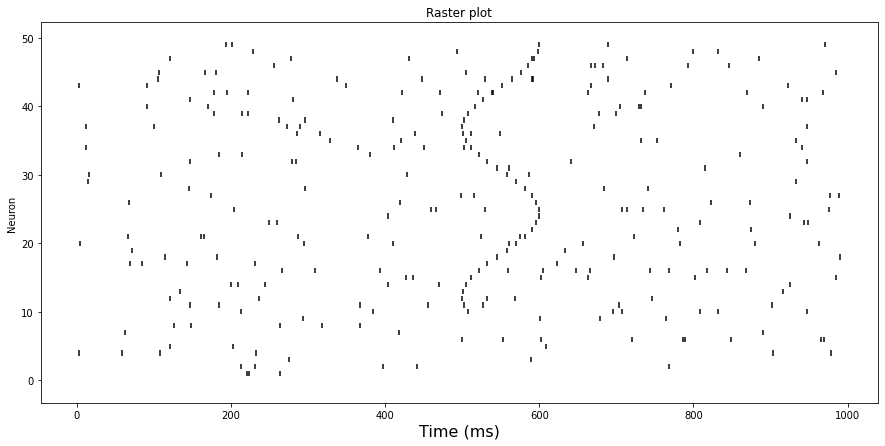

In [5]:
discard_neurons = 10 # if not None, allows to discard some neurons from the pattern, they'll have a noisy activity

spike_trains = make_spiketrains_motif(nb_neuron, noise_density, simulation_time, motif_temporal_amplitude, t_true, function= function, discard_spikes=discard_neurons)
plt.figure(figsize=(15, 7))
plt.eventplot([spike_trains[i].times for i in range(len(spike_trains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

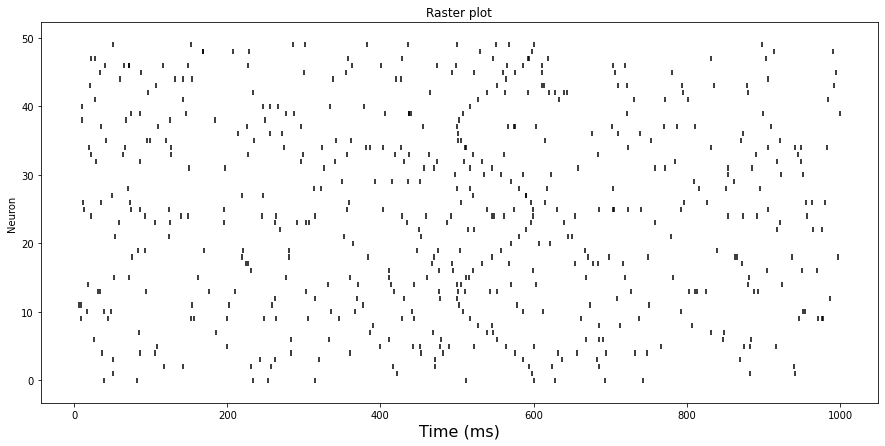

In [6]:
noise_density = 1e-2 # change noise density

spike_trains = make_spiketrains_motif(nb_neuron, noise_density, simulation_time, motif_temporal_amplitude, t_true, function= function)
plt.figure(figsize=(15, 7))
plt.eventplot([spike_trains[i].times for i in range(len(spike_trains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

# Using spade to detect the pattern

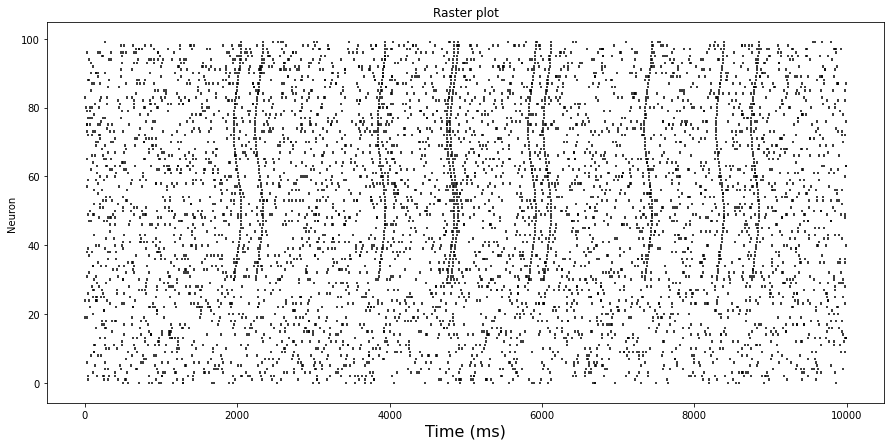

In [7]:
import numpy as np
import elephant
import quantities as pq

nb_neuron = 100
noise_density = 5e-3
simulation_time = 1e4 # in ms
motif_temporal_amplitude = 100
nb_stim = 10
discard_neurons = 30

t_true = [motif_temporal_amplitude + int(np.random.rand()*(simulation_time-3*motif_temporal_amplitude)) for i in range(nb_stim)]
spike_trains = make_spiketrains_motif(nb_neuron, noise_density, simulation_time, motif_temporal_amplitude, t_true, function= function, discard_spikes = discard_neurons)

plt.figure(figsize=(15, 7))
plt.eventplot([spike_trains[i].times for i in range(len(spike_trains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

In [ ]:
patterns = elephant.spade.spade(
    spiketrains=spike_trains, binsize=1*pq.ms, winlen=motif_temporal_amplitude, min_spikes=3,
    n_surr=100,dither=5*pq.ms,
    psr_param=[0,0,0],
    output_format='patterns')['patterns']

/usr/local/anaconda3/lib/python3.8/site-packages/elephant/spade.py:679: UserWarning: Optimized C implementation of FCA (fim.so/fim.pyd) not found in elephant/spade_src folder, or not compatible with this Python version. You are using the pure Python implementation of fast fca.
  warnings.warn(
